In [1]:
!pip install yfinance



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\srivy\AppData\Local\Temp\ipykernel_37636\1054424698.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data[stock] = yf.download(tickers=stock, period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\srivy\AppData\Local\Temp\ipykernel_37636\1054424698.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data[stock] = yf.download(tickers=stock, period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed


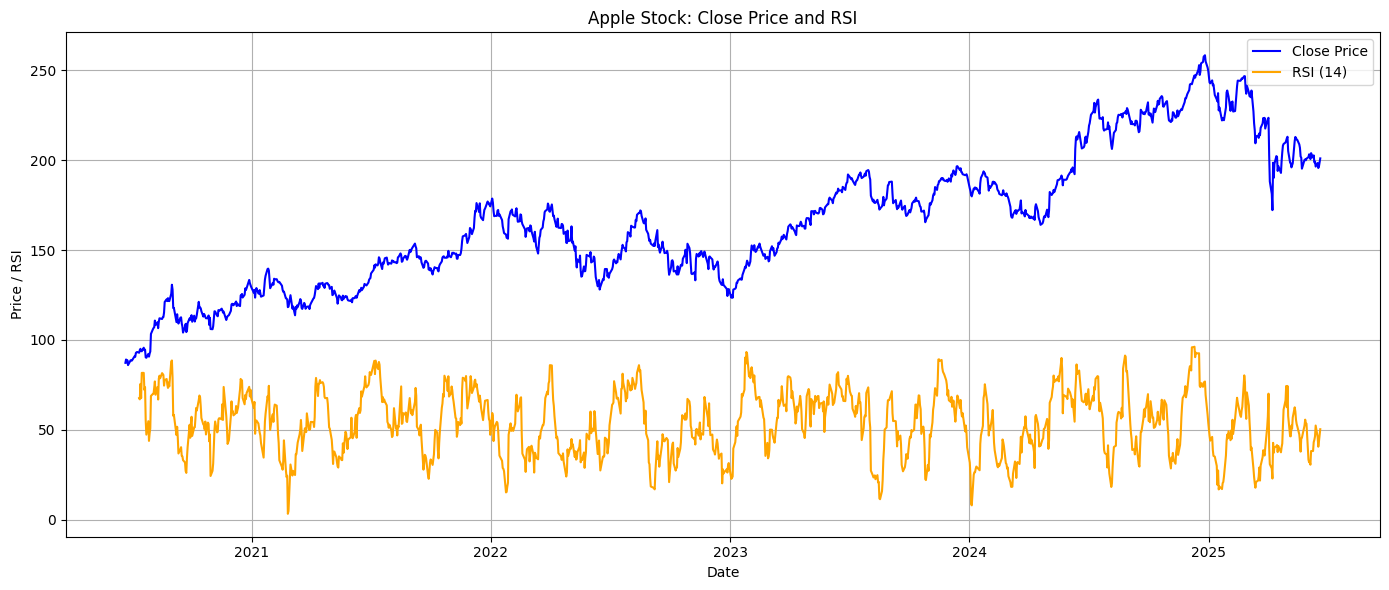

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Downloading 5 years of daily data for two tech companies
symbols = ['AAPL', 'MSFT']
market_data = {}

for stock in symbols:
    market_data[stock] = yf.download(tickers=stock, period='5y', interval='1d')

# Define a function to calculate RSI (Relative Strength Index)
def add_rsi(df, period=14):
    diff = df['Close'].diff()
    gains = diff.clip(lower=0)
    losses = -diff.clip(upper=0)

    avg_gain = gains.rolling(window=period).mean()
    avg_loss = losses.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df['RSI'] = rsi
    return df

# Apply RSI calculation to Apple data only (you can extend to both)
apple_df = market_data['AAPL'].copy()
apple_df = add_rsi(apple_df)

# Split Apple dataset into train, validation, and test (70/15/15)
total_len = len(apple_df)
train_split = int(total_len * 0.7)
val_split = int(total_len * 0.15)

train_data = apple_df.iloc[:train_split]
val_data = apple_df.iloc[train_split:train_split + val_split]
test_data = apple_df.iloc[train_split + val_split:]

# Visualization: Close price vs RSI
plt.figure(figsize=(14, 6))
plt.plot(apple_df['Close'], label='Close Price', color='blue')
plt.plot(apple_df['RSI'], label='RSI (14)', color='orange')
plt.title('Apple Stock: Close Price and RSI')
plt.xlabel('Date')
plt.ylabel('Price / RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
